In [142]:
import yfinance as yf
import pandas as pd
import os
import csv
import json
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from scipy.optimize import curve_fit 

In [143]:
cases = pd.read_csv ('Confirmed.csv')
deaths = pd.read_csv('Deaths.csv')
recovered = pd.read_csv('Recovered.csv')

Text(0, 0.5, 'Deaths')

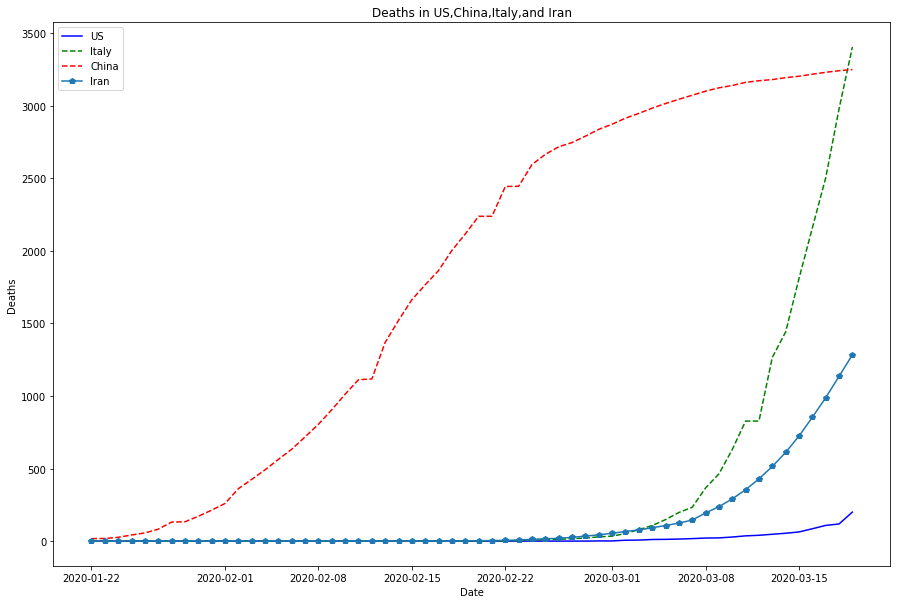

In [144]:
clean = cases.drop(columns=['Lat','Long'])
us_cases = clean.loc[clean['Country/Region'] == "US"]
china=clean.loc[clean['Country/Region'] == "China"]
clean_death = deaths.drop(columns=['Lat','Long','Province/State'])
deaths_three = clean_death.loc[(clean_death['Country/Region'] == "US") | (clean_death["Country/Region"]== "China") |
                               (clean_death["Country/Region"] == "Italy")|(clean_death["Country/Region"] == "Iran")]
deaths_grouped = deaths_three.groupby("Country/Region").sum().T
deaths_grouped["Date"] = deaths_grouped.index
deaths_grouped["Date"] = pd.to_datetime(deaths_grouped["Date"])
deaths_grouped
x = deaths_grouped["Date"]
fig = plt.figure(figsize=(15,10))
plt.plot(x,deaths_grouped["US"],'-b',label="US")
plt.plot(x,deaths_grouped["Italy"],'--g',label="Italy")
plt.plot(x,deaths_grouped["China"],'--r',label="China")
plt.plot(x,deaths_grouped["Iran"],'-p',label="Iran")
plt.legend(loc="upper left")
plt.title("Deaths in US,China,Italy,and Iran")
plt.xlabel("Date")
plt.ylabel("Deaths")

In [145]:
clean_china = china.drop(columns=['Province/State'])
china_cases = clean_china.loc[clean_china['Country/Region'] == "China"]
china_grouped = china_cases.groupby("Country/Region").sum().T
china_grouped["Date"] = china_grouped.index
china_grouped["Date"] = pd.to_datetime(china_grouped["Date"])
china_grouped

Country/Region,China,Date
1/22/20,548,2020-01-22
1/23/20,643,2020-01-23
1/24/20,920,2020-01-24
1/25/20,1406,2020-01-25
1/26/20,2075,2020-01-26
1/27/20,2877,2020-01-27
1/28/20,5509,2020-01-28
1/29/20,6087,2020-01-29
1/30/20,8141,2020-01-30
1/31/20,9802,2020-01-31


Text(0, 0.5, 'Recoveries')

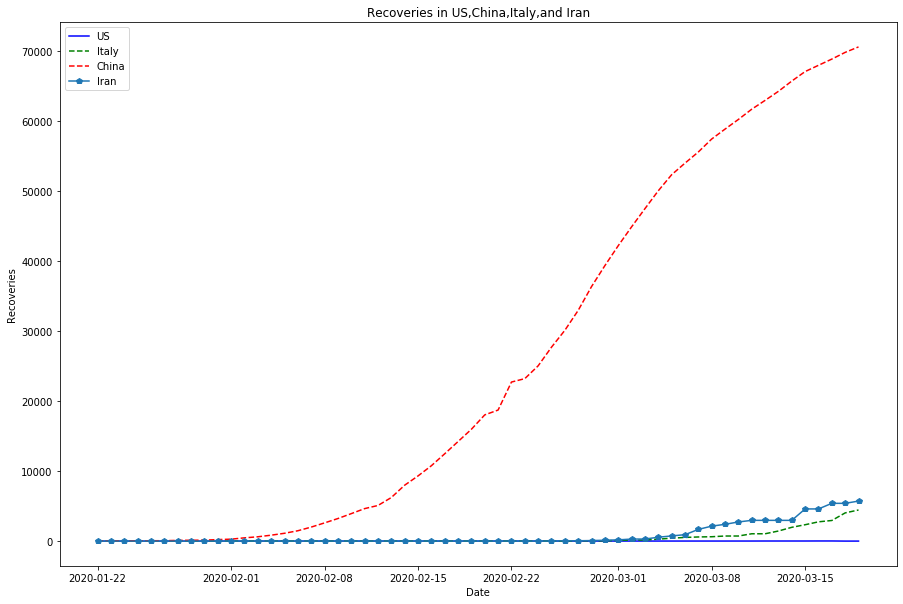

In [146]:
clean_recovered = recovered.drop(columns=['Lat','Long','Province/State'])
recovered_three = clean_recovered.loc[(clean_recovered['Country/Region'] == "US") | (clean_recovered["Country/Region"]== "China") |
                               (clean_recovered["Country/Region"] == "Italy")|(clean_recovered["Country/Region"] == "Iran")]
recovered_grouped = recovered_three.groupby("Country/Region").sum().T
recovered_grouped["Date"] = recovered_grouped.index
recovered_grouped["Date"] = pd.to_datetime(recovered_grouped["Date"])

x = recovered_grouped["Date"]
fig = plt.figure(figsize=(15,10))
plt.plot(x,recovered_grouped["US"],'-b',label="US")
plt.plot(x,recovered_grouped["Italy"],'--g',label="Italy")
plt.plot(x,recovered_grouped["China"],'--r',label="China")
plt.plot(x,recovered_grouped["Iran"],'-p',label="Iran")
plt.legend(loc="upper left")
plt.title("Recoveries in US,China,Italy,and Iran")
plt.xlabel("Date")
plt.ylabel("Recoveries")

In [147]:
recovered_grouped

Country/Region,China,Iran,Italy,US,Date
1/22/20,28,0,0,0,2020-01-22
1/23/20,30,0,0,0,2020-01-23
1/24/20,36,0,0,0,2020-01-24
1/25/20,39,0,0,0,2020-01-25
1/26/20,49,0,0,0,2020-01-26
1/27/20,58,0,0,0,2020-01-27
1/28/20,101,0,0,0,2020-01-28
1/29/20,120,0,0,0,2020-01-29
1/30/20,135,0,0,0,2020-01-30
1/31/20,214,0,0,0,2020-01-31


In [148]:
us_group = pd.DataFrame({"Total": us_cases.sum()})

clean_us= us_group.drop(["Province/State","Country/Region"])
#grouped_us = us_cases.groupby("Country/Region").sum()
#grouped_us.rename(columns={"US":"Confirmed Cases","Country/Region":"Date"})
clean_us["Date"] = clean_us.index
clean_us["Date"] = pd.to_datetime(clean_us["Date"])

In [149]:
clean_us

,Total,Date
1/22/20,1,2020-01-22
1/23/20,1,2020-01-23
1/24/20,2,2020-01-24
1/25/20,2,2020-01-25
1/26/20,5,2020-01-26
1/27/20,5,2020-01-27
1/28/20,5,2020-01-28
1/29/20,5,2020-01-29
1/30/20,5,2020-01-30
1/31/20,7,2020-01-31


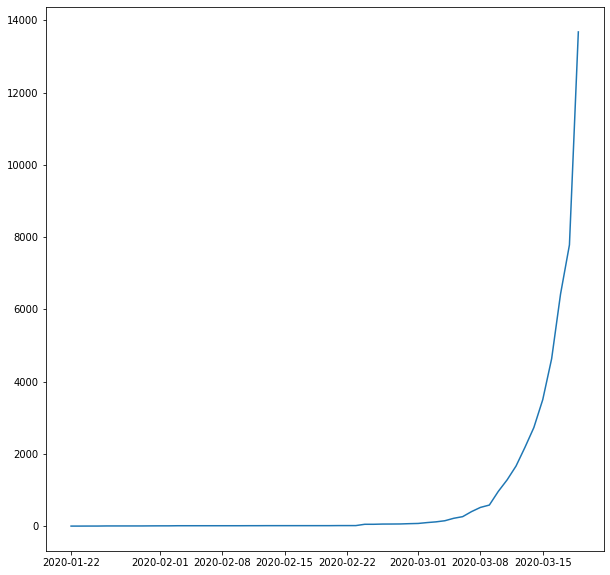

In [150]:
fig= plt.figure(figsize=(10,10))
x = clean_us["Date"]
y= clean_us["Total"]
plt.plot(x,y)

In [151]:
ticker = yf.Ticker("^DJI")
hist = yf.download("^DJI", start = "2020-01-22",end='2020-03-19')


[*********************100%***********************]  1 of 1 completed


In [152]:
closing_stock =hist.iloc[:,3]
closing_df = pd.DataFrame(closing_stock)
closing_df

,Close
Date,
2020-01-22,29186.269531
2020-01-23,29160.089844
2020-01-24,28989.730469
2020-01-27,28535.800781
2020-01-28,28722.849609
2020-01-29,28734.449219
2020-01-30,28859.439453
2020-01-31,28256.029297
2020-02-03,28399.810547


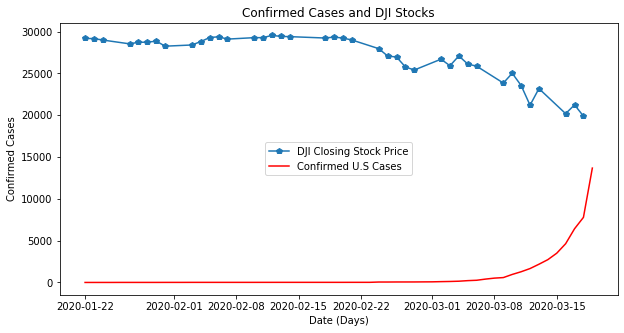

In [163]:
plt.figure(figsize=(10,5))
plt.plot(closing_df,'-p',label="DJI Closing Stock Price")
plt.plot(x,y,'-r',label="Confirmed U.S Cases")
plt.xlabel("Date (Days)")
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases and DJI Stocks")
plt.legend(loc="center")

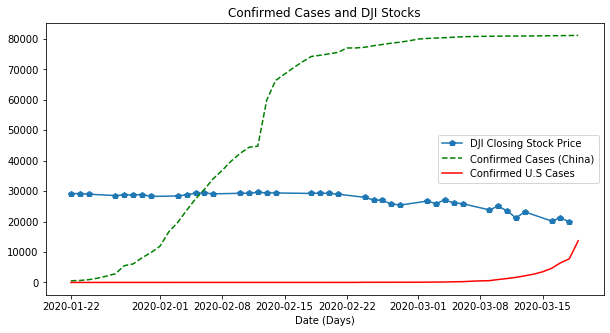

In [162]:
plt.figure(figsize=(10,5))
plt.plot(closing_df,'-p',label="DJI Closing Stock Price")
plt.plot(x,china_grouped["China"],'--g',label='Confirmed Cases (China)')
plt.plot(x,y,'-r',label="Confirmed U.S Cases")
plt.xlabel("Date (Days)")
plt.title("Confirmed Cases and DJI Stocks")
plt.legend(loc="right")

In [12]:
clean_us.size

108

In [165]:
combined = pd.merge(clean_us,closing_df,on= "Date")
combined

,Total,Date,Close
0,1,2020-01-22,29186.269531
1,1,2020-01-23,29160.089844
2,2,2020-01-24,28989.730469
3,5,2020-01-27,28535.800781
4,5,2020-01-28,28722.849609
5,5,2020-01-29,28734.449219
6,5,2020-01-30,28859.439453
7,7,2020-01-31,28256.029297
8,11,2020-02-03,28399.810547
9,11,2020-02-04,28807.630859


The correlation between COVID cases and DJI Stocks is -0.8


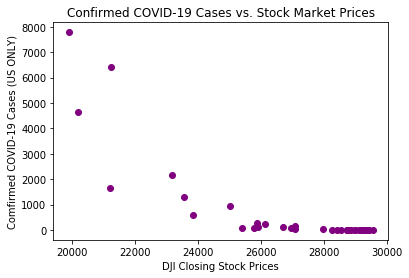

In [172]:
x_combined = combined["Close"]
y_combined = combined["Total"]
plt.scatter(x_combined,y_combined,color = 'purple')
plt.ylabel("Comfirmed COVID-19 Cases (US ONLY)")
plt.xlabel("DJI Closing Stock Prices")
plt.title("Confirmed COVID-19 Cases vs. Stock Market Prices")


correlation = st.pearsonr(x_combined,y_combined)
print(f"The correlation between COVID cases and DJI Stocks is {round(correlation[0],2)}")
